## Dataset Overview
The Exploratory Data Analysis is based on the Blinkit dataset, sourced from Kaggle. The dataset includes several key variables:

**Blinkit Sales Data**

Rows: 8,523

Columns: 12

**Columns Description**

1. **Item Fat Content** – Categorical (e.g., Low Fat, Regular)

2. **Item Identifier** – Unique code for each product

3. **Item Type** – Category of product (e.g., Fruits, Frozen Foods, Soft Drinks, Dairy, etc.)

4. **Outlet Establishment Year** – Year the outlet was established

5. **Outlet Identifier** – Unique code for each outlet

6. **Outlet Location Type** – Location tier (Tier 1, Tier 2, Tier 3)

7. **Outlet Size** – Size of the outlet (Small, Medium, High)

8. **Outlet Type** – Type of outlet (Supermarket Type1, Type2, Type3, Grocery Store)

9. **Item Visibility** – Numerical value indicating product visibility in the store

10. **Item Weight** – Weight of the item (some missing values seen in screenshot)

11. **Sales** – Target variable (numerical, total sales of the item in that outlet)

12. **Rating** – Customer ratings (scale 1–5, looks like integer values)

## Objectives



1. **Checking outliers in the data**- checking and Teaating Outliers if there is any.
2. **Customer Behaviour Analysis** – Understand how Item Type, Item Fat Content, and Item Visibility impact sales.
3. **Outlet Performance Analysis** – Compare sales across outlet types, sizes, and locations.
4. **Product Performance Analysis** – Identify top-selling categories and products.
5. **Rating Insights** – Check correlation between Rating and Sales.
6. **Business Recommendations** – Suggest which outlets or product categories to prioritise for increasing sales.



In [1]:
# Import all required libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random 
from warnings import filterwarnings
filterwarnings ('ignore')
plt.rcParams['figure.figsize']=(8,5) 


In [2]:
# Import Data From CSV or Excel
df_blinkit= pd.read_excel('blinkit.xlsx')
df_blinkit

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


In [3]:
# Checking Top 5 data
df_blinkit.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [4]:
# Checking the bottom 5 data
df_blinkit.tail(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [5]:
# Replacing same values
df_blinkit['Item Fat Content'] = df_blinkit['Item Fat Content'].replace({
    'low fat': 'Low Fat',
    'reg': 'Regular',
    'LF':'Low Fat'
})

In [25]:
df_blinkit.value_counts()

Item Fat Content  Item Identifier  Item Type              Outlet Establishment Year  Outlet Identifier  Outlet Location Type  Outlet Size  Outlet Type        Item Visibility  Item Weight  Sales     Rating
Low Fat           DRA12            Soft Drinks            2011                       OUT010             Tier 3                High         Grocery Store      0.068535         11.60        143.0154  3.6       1
Regular           FDA55            Fruits and Vegetables  2014                       OUT013             Tier 3                High         Supermarket Type1  0.056942         17.20        222.5088  4.3       1
                  FDB04            Dairy                  2014                       OUT013             Tier 3                High         Supermarket Type1  0.063174         11.35        86.1856   4.0       1
                  FDB03            Dairy                  2022                       OUT018             Tier 3                Medium       Supermarket Type2  0.15747

In [21]:
# Counting the values of replace items
print(df_blinkit['Item Fat Content'].value_counts())

Item Fat Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64


In [7]:
# check the shape of data
df_blinkit.shape

(8523, 12)

In [8]:
# Describing the Data
df_blinkit.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [9]:
df_blinkit.describe(include= object)

,Item Fat Content,Item Identifier,Item Type,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type
count,8523,8523,8523,8523,8523,8523,8523
unique,2,1559,16,10,3,3,4
top,Low Fat,FDW13,Fruits and Vegetables,OUT027,Tier 3,Medium,Supermarket Type1
freq,5517,10,1232,935,3350,3631,5577


In [10]:
df_blinkit['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [105]:
# Checking Information of data
df_blinkit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [106]:
# Checking Duplicate values
df_blinkit.duplicated().sum()

0

In [108]:
# Checking null values
df_blinkit.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [109]:
# Checking null values by Precentage
df_blinkit.isnull().sum()/df_blinkit.isnull().count()*100

Item Fat Content              0.000000
Item Identifier               0.000000
Item Type                     0.000000
Outlet Establishment Year     0.000000
Outlet Identifier             0.000000
Outlet Location Type          0.000000
Outlet Size                   0.000000
Outlet Type                   0.000000
Item Visibility               0.000000
Item Weight                  17.165317
Sales                         0.000000
Rating                        0.000000
dtype: float64

In [110]:
# Removing null values 
df_blinkit['Item Weight'].fillna(df_blinkit['Item Weight'].mode()[0],inplace=True)

In [111]:
df_blinkit['Item Weight'].isnull().sum()

0

## For checking outliers


<Axes: >

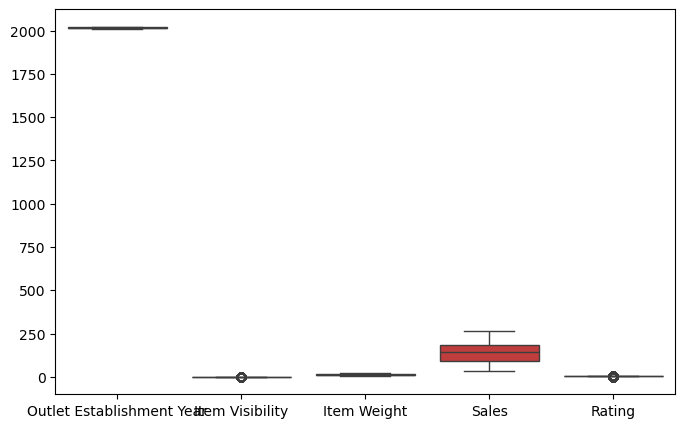

In [112]:
sns.boxplot(df_blinkit)

<Axes: ylabel='Item Visibility'>

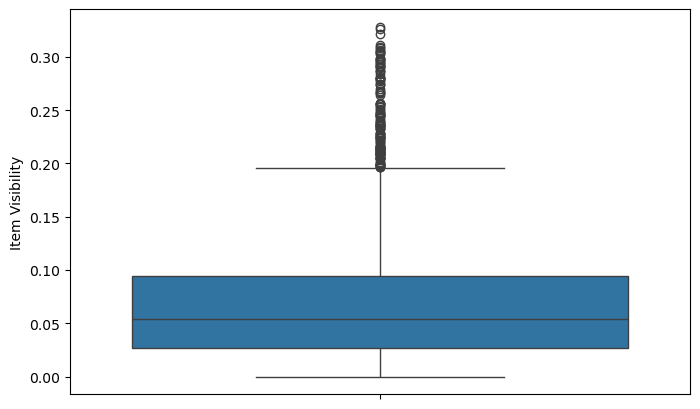

In [137]:
# Checking Outliers separately in Item Visibility
sns.boxplot(df_blinkit['Item Visibility'])

<Axes: ylabel='Rating'>

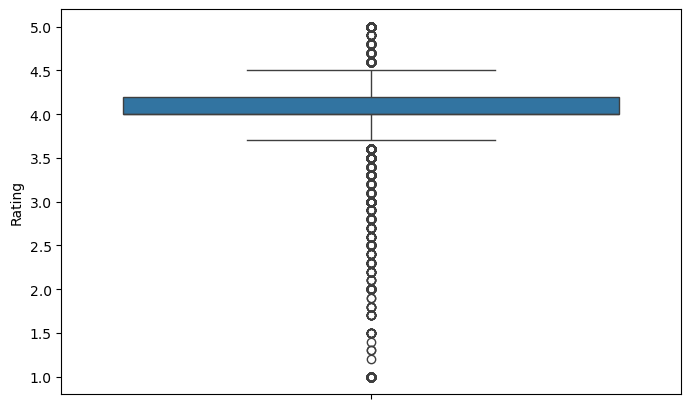

In [138]:
# Checking Outliers separately in Rating
sns.boxplot(df_blinkit['Rating'])

<Axes: ylabel='Outlet Establishment Year'>

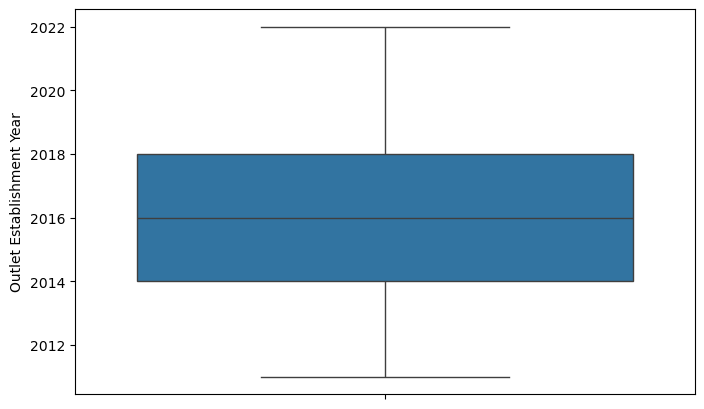

In [14]:
sns.boxplot(df_blinkit['Outlet Establishment Year'])

<Axes: ylabel='Sales'>

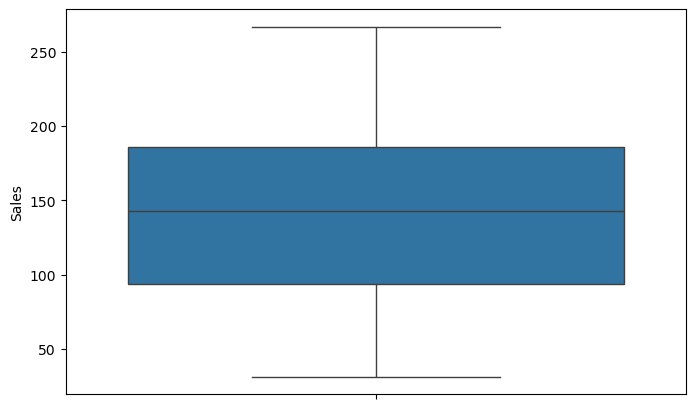

In [17]:
sns.boxplot(df_blinkit['Sales'])

<Axes: ylabel='Item Weight'>

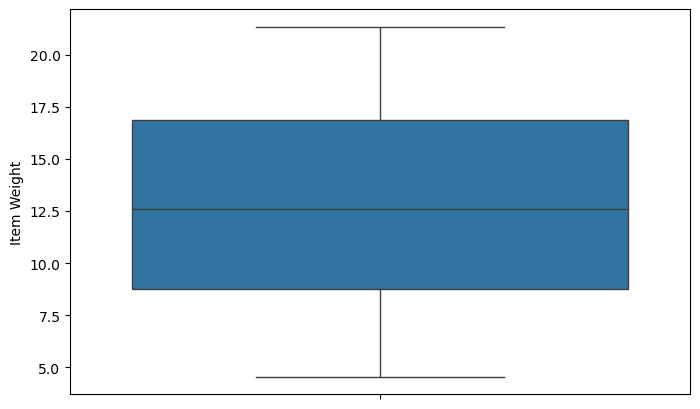

In [19]:
sns.boxplot(df_blinkit['Item Weight'])

## Insights
After analyzing all the columns for outliers, we found that only Item Visibility and Rating contain outliers, which need to be treated

In [113]:
# Checking Types of Columns
df_blinkit.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [114]:
df_blinkit.select_dtypes

<bound method DataFrame.select_dtypes of      Item Fat Content Item Identifier              Item Type  \
0             Regular           FDX32  Fruits and Vegetables   
1             Low Fat           NCB42     Health and Hygiene   
2             Regular           FDR28           Frozen Foods   
3             Regular           FDL50                 Canned   
4             Low Fat           DRI25            Soft Drinks   
...               ...             ...                    ...   
8518          Low Fat           NCT53     Health and Hygiene   
8519          Low Fat           FDN09            Snack Foods   
8520          Low Fat           DRE13            Soft Drinks   
8521          Regular           FDT50                  Dairy   
8522          Regular           FDM58            Snack Foods   

      Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                          2012            OUT049               Tier 1   
1                          2022           

In [115]:
# Separating Numerical data in df_blink & Categorical data in df_it
df_blink = df_blinkit.select_dtypes(include=np.number)
df_it = df_blinkit.select_dtypes(include= object)

In [116]:
# Columns
df_blink.columns

Index(['Outlet Establishment Year', 'Item Visibility', 'Item Weight', 'Sales',
       'Rating'],
      dtype='object')

In [117]:
# Checking the Skewness of df_blink for removing the outliers
df_blink.skew()

Outlet Establishment Year    0.061921
Item Visibility              1.167090
Item Weight                  0.175321
Sales                        0.127202
Rating                      -2.188976
dtype: float64

In [118]:
# Making new df_b for treating Outliers
df_b= df_blinkit.copy()
col_names=['Rating','Item Visibility']
features=df_b[col_names]

In [119]:
# Importing PowerTransformer from sklearn for treating outliers
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson', standardize=True)
df_b[col_names] = scaler.fit_transform(features.values)


In [120]:
#Outliers have been handled and now fall within the range of 0 to 1.
df_b[col_names].skew()

Rating             0.153352
Item Visibility    0.124279
dtype: float64

## Exploratory Data Analysis

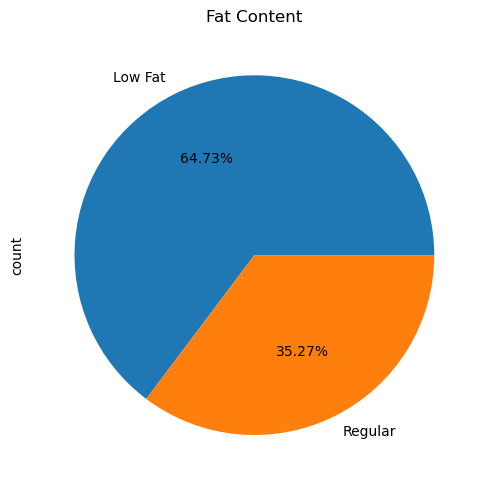

In [132]:
# Piechart Fat Content
df_b['Item Fat Content'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Fat Content')
plt.tight_layout()
plt.show()

## Insights

 Fat Content Insights

* **Low Fat** products account for **64.73%** of items.
* **Regular** products make up **35.27%**.
* This shows that **nearly two-thirds of the products are marketed as Low Fat**, indicating a strong focus on healthier options.



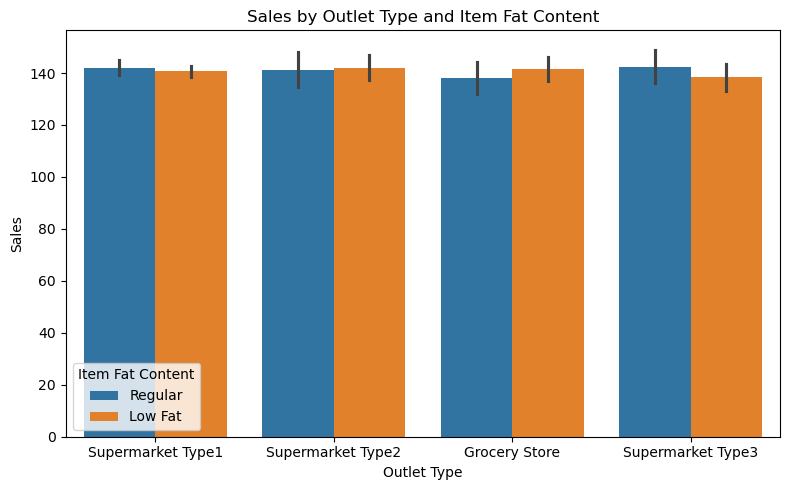

In [143]:
# Barplot Sales by Outlet Type and Item Fat Content
sns.barplot(data=df_b, x='Outlet Type', y='Sales', hue='Item Fat Content')
plt.title('Sales by Outlet Type and Item Fat Content')
plt.xlabel('Outlet Type')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

## Insights

1. **Balanced Sales Across Fat Types**

   * Sales for **Regular** and **Low Fat** products are almost the same across all outlet types.
   * This suggests **fat content does not significantly influence sales performance**.

2. **Outlet Performance**

   * All outlet types (Supermarket Type1, Type2, Type3, and Grocery Store) show sales clustered around **140 units**.
   * No outlet type has a dramatic lead — performance is relatively consistent.

3. **Slight Variations**

   * In **Grocery Stores**, *Low Fat* slightly outsells Regular.
   * In **Supermarket Type3**, *Regular* slightly outsells Low Fat.
   * These differences are minor and likely not statistically significant.


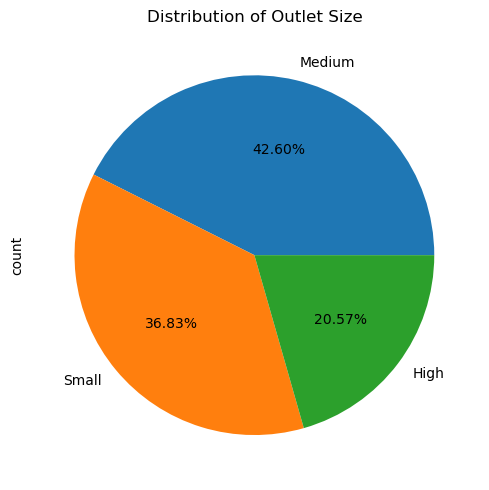

In [124]:
# Piechart Distribution of Outlet Size
df_b['Outlet Size'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Distribution of Outlet Size')
plt.tight_layout()
plt.show()

## Insights

1. **Medium outlets dominate**

   * **42.60%** of outlets are *Medium* in size.
   * This makes them the most common outlet type in the dataset.

2. **Small outlets are the second largest group**

   * **36.83%** of outlets are *Small*.
   * Indicates Blinkit has a significant footprint in smaller retail spaces.

3. **High outlets are least common**

   * Only **20.57%** of outlets are *High* in size.
   * Suggests fewer large-format stores exist in the network.







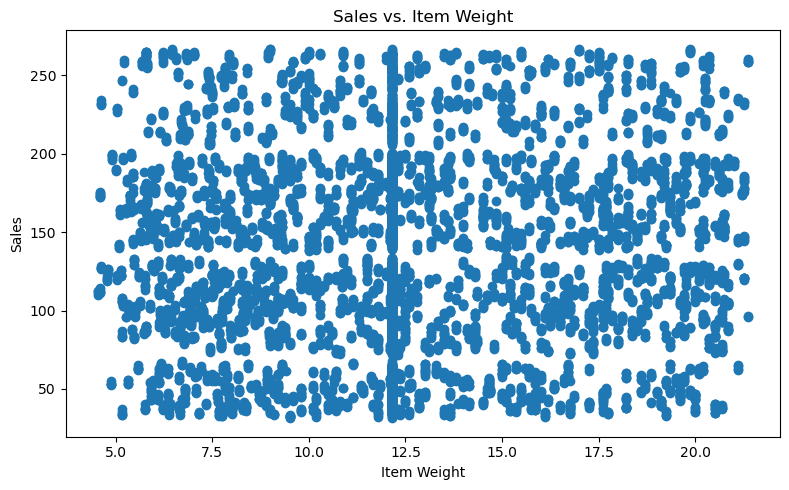

In [125]:
# Scatterplot Sales vs Item Weight
plt.scatter(df_b['Item Weight'], df_b['Sales'])
plt.title('Sales vs. Item Weight')
plt.xlabel('Item Weight')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

## Insights

1. **No clear relationship**

   * The scatter is spread randomly, showing **no significant correlation** between `Item Weight` and `Sales`.
   * Sales occur across all weight ranges almost evenly.

2. **Wide spread of sales values**

   * Regardless of whether the item is light (5 kg) or heavy (20+ kg), sales can be both high and low.
   * This suggests weight is **not a deciding factor for customer purchases**.

3. **Dense cluster around 12.5 kg**

   * There seems to be a vertical dense line around **12.5 kg**, possibly because many items in the dataset share this approximate weight.
   * It’s more about product variety than a true sales-driver.





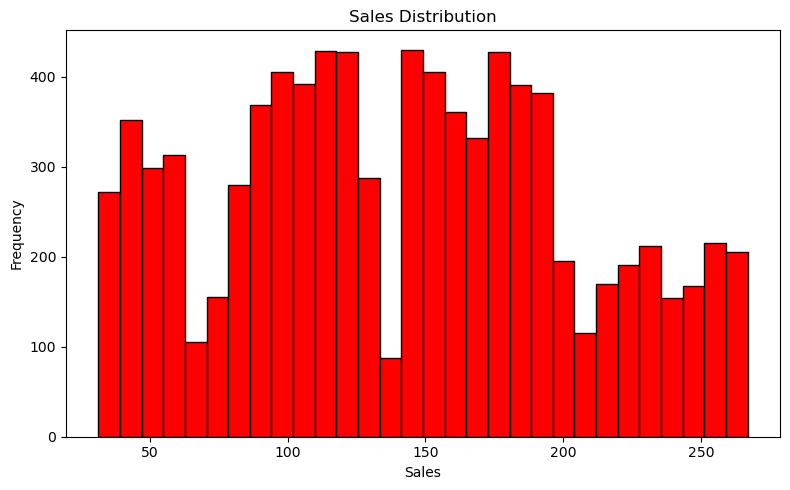

In [126]:
# Histogram Sales Distribution
df_b['Sales'].plot(kind='hist', bins=30, edgecolor='black',color='red')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.tight_layout()
plt.show()

## Insights

1. **Wide spread of sales**

   * Sales range from **below 50 to above 250 units**, showing a broad variation in product performance.

2. **Multiple peaks (multimodal distribution)**

   * The histogram is not smooth or bell-shaped; it has **several peaks** (e.g., around 50, 120, 150, 180).
   * This suggests the dataset has **different sales clusters** rather than one central pattern.

3. **Most frequent sales range**

   * The highest frequency of sales occurs around **100–180 units**, where the bars are tallest.
   * Very low (<50) and very high (>220) sales occur less frequently.





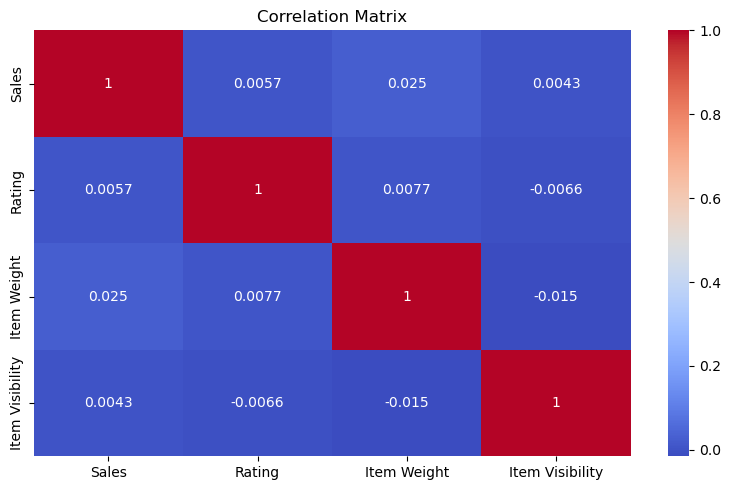

In [127]:
# Correlation matrix
corr = df_b[['Sales', 'Rating', 'Item Weight', 'Item Visibility']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## Insights
1. **Very weak correlations overall**

   * `Sales` has **almost no correlation** with `Rating` (0.0057), `Item Weight` (0.025), and `Item Visibility` (0.0043).
   * This indicates that these features do **not significantly influence sales performance**.

2. **Independent variables**

   * `Item Weight`, `Rating`, and `Item Visibility` show very weak or even negative correlations with each other.
   * Suggests they behave independently, without overlapping effects.

3. **No strong predictor here**

   * None of the variables in this heatmap stand out as strong drivers of `Sales`.
   * Likely, other factors (such as **Item MRP, Outlet Type, Outlet Size, or Item Type**) are more important.



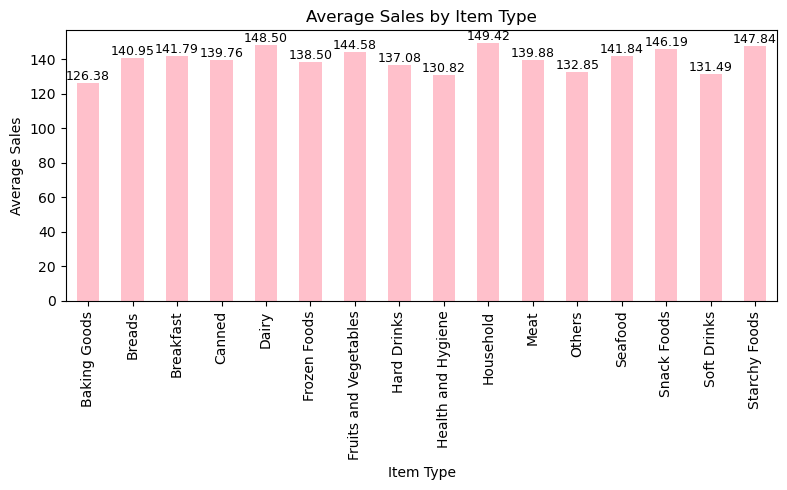

In [139]:
# Barchart Average Sales by Item Type
avg_sales = df_b.groupby('Item Type')['Sales'].mean()
ax = avg_sales.plot(kind='bar', color='pink')

for i, value in enumerate(avg_sales):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

plt.title('Average Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()

## Insights

1. **Top Performing Categories**

   * **Dairy (148.50)**, **Starchy Foods (147.84)**, **Snack Foods (146.19)**, and **Fruits & Vegetables (144.58)** have the highest average sales.
   * These categories are core drivers of revenue.

2. **Moderately Performing Categories**

   * Categories like **Frozen Foods (138.50)**, **Canned (139.76)**, and **Household (139.82)** show stable but slightly lower averages.
   * Still important contributors.

3. **Low Performing Categories**

   * **Baking Goods (126.38)**, **Health & Hygiene (130.82)**, and **Soft Drinks (131.49)** are among the lowest in average sales.
   * Indicates weaker customer demand or limited variety in these segments.

